In [1]:
import pandas as pd
import numpy as np

In [2]:
coso = pd.read_csv('data/coso.csv')
new0 = pd.read_csv('data/New_DB_new0.csv')
new0 = new0[['PP', 'slope', 'valor_humedad_suelo1', 'Latitud', 'Longitud']].dropna()
coso = coso[['PP', 'slope', 'valor_humedad_suelo1', 'Latitud', 'Longitud']].dropna()

data_0 = pd.read_csv('data/xterrae_data_0').dropna()
data_1 = pd.read_csv('data/xterrae_data_1').dropna()

data_0 = pd.merge(new0, data_0, on=['Latitud', 'Longitud'], how='inner')
data_1 = pd.merge(coso, data_1, on=['Latitud', 'Longitud'], how='inner')

data_0 = data_0.drop(columns=['Unnamed: 0', 'Latitud', 'Longitud'])
data_1 = data_1.drop(columns=['Unnamed: 0', 'Latitud', 'Longitud'])
data_0['Valor'] = 0
data_1['Valor'] = 1

final_db = pd.read_csv('data/final_db.csv')
final_db = final_db.drop(columns='Unnamed: 0')

In [3]:
#importe de funciones locales
from util import comparar_columnas, eliminar_caracteristicas, prueba_umbral

#Analizar si todas las columnas estan para luego concatenar
comparar_columnas(final_db, data_0)
comparar_columnas(final_db, data_1)

Todas las columnas de df1 están en df2.
Todas las columnas de df2 están en df1.
Todas las columnas de df1 están en df2.
Todas las columnas de df2 están en df1.


In [4]:
# Concatenación y eliminación de valores NaN
final = pd.concat([final_db, data_0])
final = pd.concat([final, data_1])
final = final.dropna()

# Separación de los valores
final_x = final.drop(columns='Valor')
final_y = final.Valor


In [5]:
# Prueba de características eliminadas a parti de diferentes valores de umbrales
umbrales = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]
resultados = prueba_umbral(final, umbrales=umbrales)
print(resultados)

   Umbral  Caracteristicas eliminadas
0    0.10                         136
1    0.20                         135
2    0.30                         131
3    0.40                         130
4    0.50                         128
5    0.60                         128
6    0.70                         122
7    0.80                         113
8    0.90                          91
9    0.99                          38


In [6]:
# Se reduce el df según el valor de umbral elegido
df_reducido, num_eliminadas = eliminar_caracteristicas(final, 0.99)
final = df_reducido
print(f'Dimensión del df después de eliminación por umbral: {final.shape}')

Dimensión del df después de eliminación por umbral: (3148, 99)


In [7]:
"""import seaborn as sns
import matplotlib.pyplot as plt
corr = final.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 12))

heatmap = sns.heatmap(corr, mask=mask, cmap='pink_r', vmax=.3, center=0,
            annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

title = heatmap.set_title("Correlation Heatmap", weight='bold', size=16)
title.set_position([0.45, 1.1])
plt.show()"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\ncorr = final.corr()\nmask = np.triu(np.ones_like(corr, dtype=bool))\n\nfig, ax = plt.subplots(figsize=(15, 12))\n\nheatmap = sns.heatmap(corr, mask=mask, cmap=\'pink_r\', vmax=.3, center=0,\n            annot=True, fmt=\'.2f\', square=True, linewidths=.5, cbar_kws={"shrink": .5})\n\nplt.xticks(rotation=45, ha=\'right\')\nplt.yticks(rotation=0)\n\ntitle = heatmap.set_title("Correlation Heatmap", weight=\'bold\', size=16)\ntitle.set_position([0.45, 1.1])\nplt.show()'

In [8]:
# Importaciones de funciones para generar los modelos
# Importaciones de selección de características
from feature_selection import cart_feature_selection, seleccion_caracteristicas_genetico
from models_gen_X_y import xgboost_random_search, xgboost_bayesopt_classifier, mlp_binary_classification, svm_with_hyperparameter_tuning

In [9]:
# Selección de características por cart y luego se establecen los dataframe con las características elegidas
cart_features = cart_feature_selection(final, 'Valor', n_features=30)
X = final[cart_features]
y = final['Valor']
print(f'Caracateristicas seleccionadas por cart: {cart_features}')

Caracateristicas seleccionadas por cart: ['slope', 'valor_humedad_suelo1', 'PP', 'ksat_60-100cm.tif', 'PIRange_Clay.15-30cm.tif', 'PIRange_Bulkd.60-100cm.tif', 'PIRange_Clay.30-60cm.tif', 'PIRange_Clay.0-5cm.tif', 'PIRange_Clay.100-200cm.tif', 'PIRange_Clay.60-100cm.tif', 'Bulkd.60-100cm.tif', 'PIRange_Bulkd.5-15cm.tif', 'Clay.5-15cm.tif', 'Clay.15-30cm.tif', 'PIRange_Bulkd.100-200cm.tif', 'PIRange_Sand.15-30cm.tif', 'Clay.0-5cm.tif', 'Silt.15-30cm.tif', 'n_30-60cm.tif', 'PIRange_Sand.30-60cm.tif', 'n_5-15cm.tif', 'PIRange_Sand.60-100cm.tif', 'Bulkd.15-30cm.tif', 'PIRange_Sand.0-5cm.tif', 'ksat_100-200cm.tif', 'AvMoist.60-100cm.tif', 'ksat_5-15cm.tif', 'Sand.0-5cm.tif', 'n_60-100cm.tif', 'ksat.15-30cm.tif']


In [ ]:
#ga_features = ['PIRange_Clay.30-60cm.tif', 'PIRange_Sand.15-30cm.tif', 'n_60-100cm.tif', 'theta_r_60-100cm.tif', 'Bulkd.15-30cm.tif', 'Silt.0-5cm.tif', 'Tex_Class.100-200cm.tif', 'Tex_Class.15-30cm.tif', 'PP', 'slope']
#X = final[ga_features]
#y = final['Valor']

Número de muestras de entrenamiento: 2518, Número de muestras de prueba: 630
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión: 87.94%


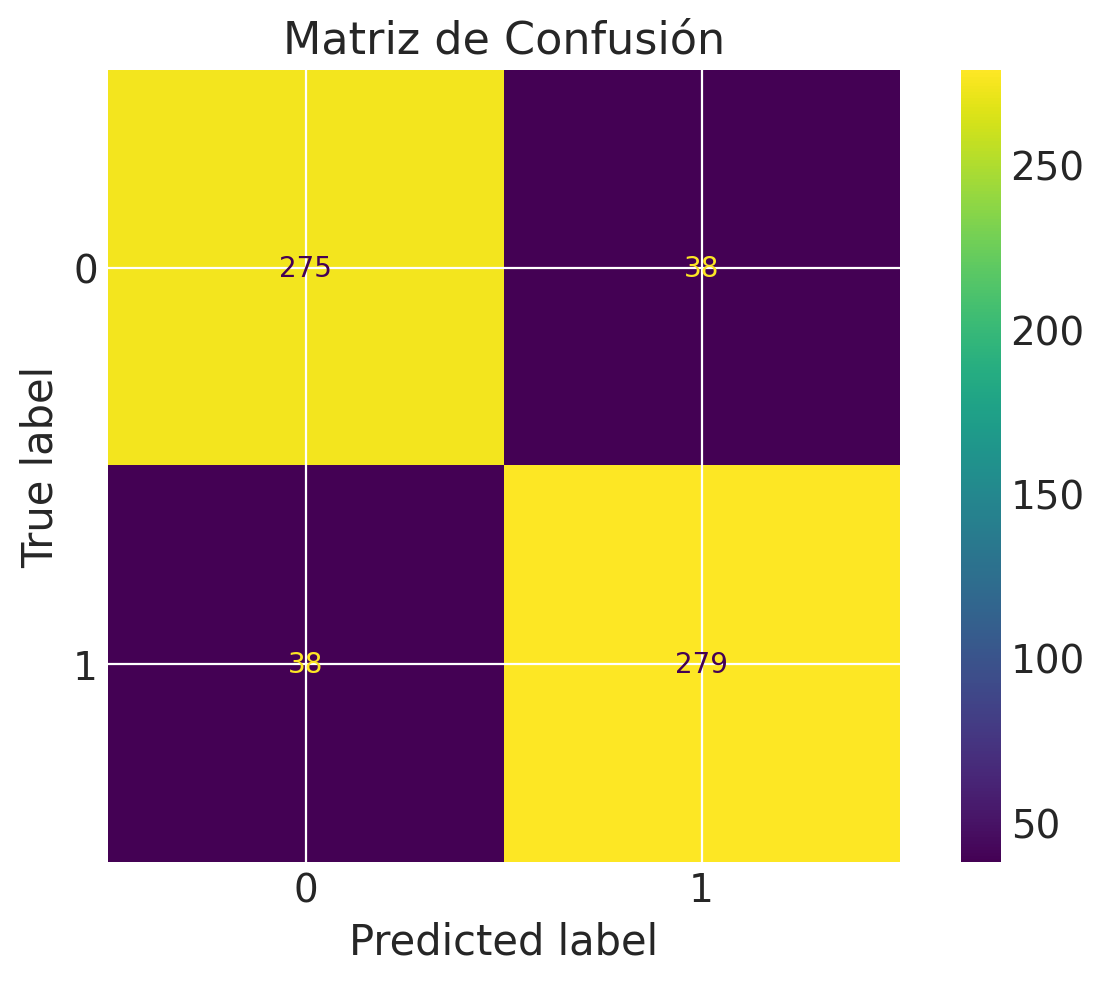

{'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=1.0, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0.1, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.1, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=500,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 'accuracy': 0.8793650793650793,
 'best_params': {'subsample': 1.0,
  'reg_lambda': 0,
  'reg_alpha': 0.1,
  'n_estimators': 500,
  'max_depth': 5,
  'learning_rate': 0.1,
  'gamma': 0.1,
  'colsample_bytree': 1.0}}

In [38]:
# Estancia para modelo de xgboost_random_search

# Se define los parámetros a buscar para el ajuste del modelo
param_grid = {
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.1, 0.2, 0.3],
        'n_estimators': [100, 200, 300, 500],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'gamma': [0, 0.1, 0.2, 0.3],
        'reg_alpha': [0, 0.1, 0.5, 1.0],
        'reg_lambda': [0, 1.0, 10.0]
        }
xgboost_random_search(X, y, param_grid=param_grid)

Informe de clasificación
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       306
           1       0.76      0.77      0.76       324

    accuracy                           0.75       630
   macro avg       0.75      0.75      0.75       630
weighted avg       0.75      0.75      0.75       630

Matriz de confusión
[[227  79]
 [ 76 248]]


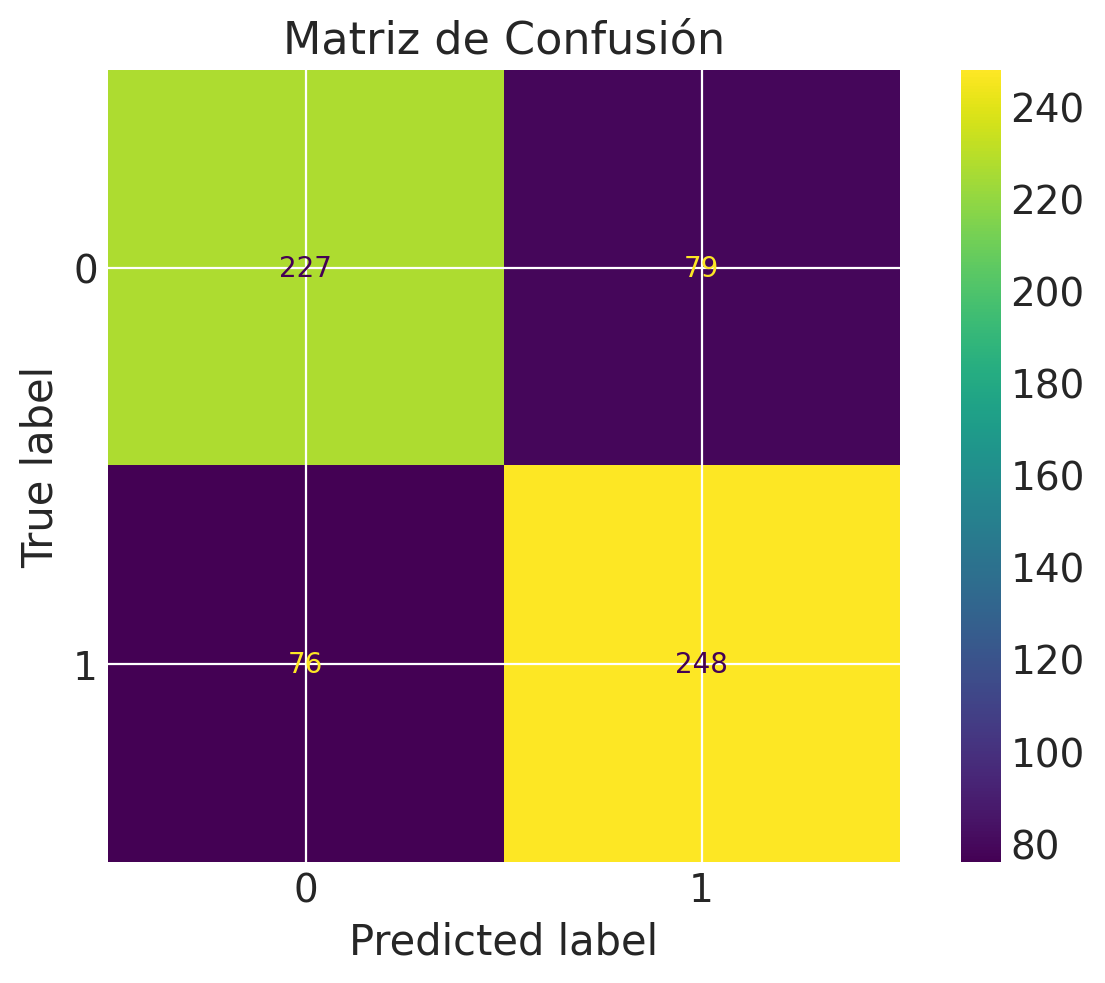

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                               random_state=42))])

In [39]:
mlp_binary_classification(X,y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\xgboost\core.py:158: UserWarning: [15:20:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'xgb__colsample_bytree': 0.7954166302845054, 'xgb__gamma': 0.015250124969524714, 'xgb__learning_rate': 0.046974706861722275, 'xgb__max_depth': 8, 'xgb__min_child_weight': 3.381022389395617, 'xgb__n_estimators': 543, 'xgb__subsample': 0.6633256208980205}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       306
           1       0.83      0.85      0.84       324

    accuracy                           0.83       630
   macro avg       0.83      0.83      0.83       630
weighted avg       0.83      0.83      0.83       630


Matriz de confusión:
[[249  57]
 [ 50 274]]


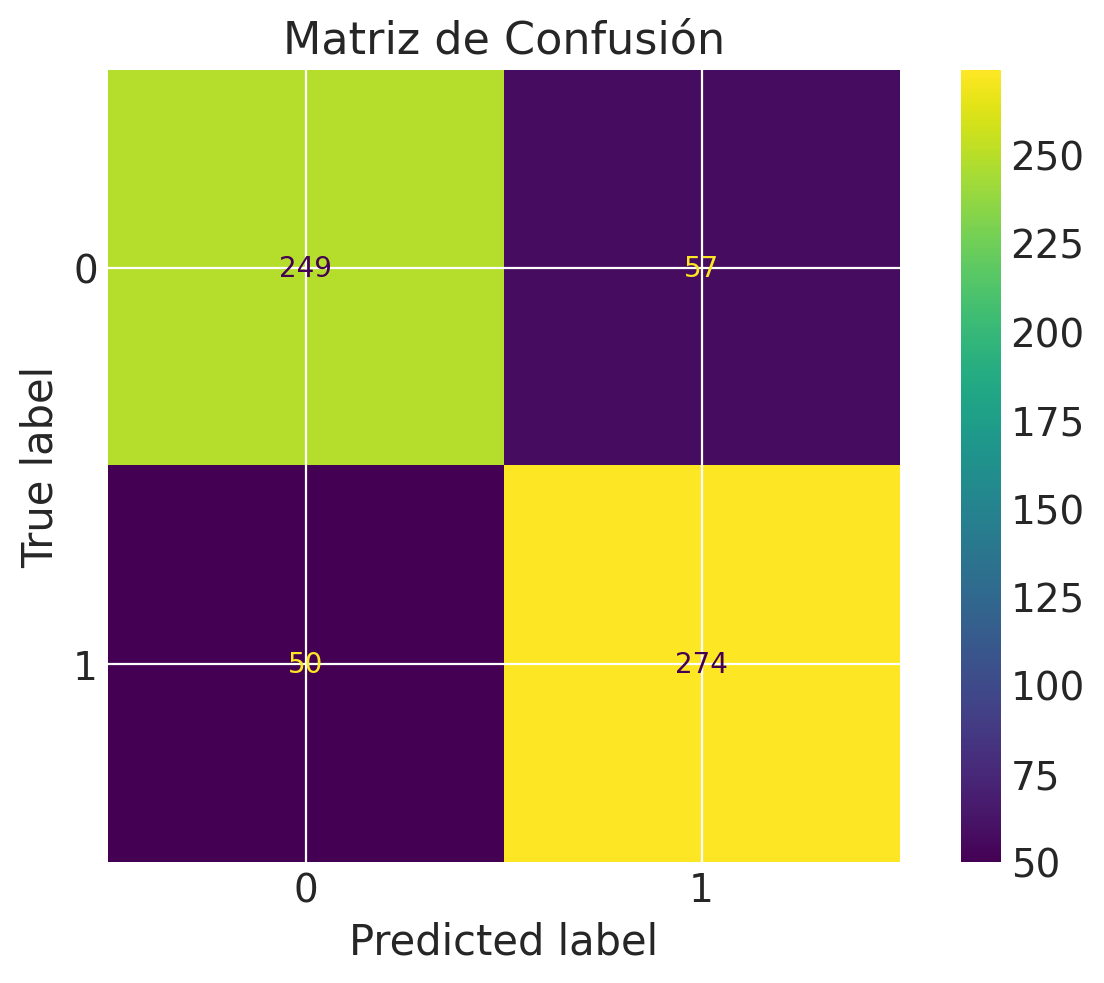

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importa...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE17BA9790>,
                                        'xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BE1563D6A0>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE1563DC70>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BE17BA9EE0>},
                   random_state=42, verbose=1)

In [40]:
xgboost_bayesopt_classifier(X,y)

In [16]:
# Se obtuvieron los valores de lo modelos con los datos raw
# ahora se realiza la depuración mediante PUBagging para reentrenar los model
# y comparar los resultados de los modelos sin/con PUBagging

from pubagging import PUBagging

data = final[cart_features]
data['Valor'] = final.Valor
data_aux_1 = data[data.Valor == 1]
data_aux_0 = data[data.Valor == 0]
data_aux_0 = data_aux_0.drop(columns='Valor')
data_aux_1 = data_aux_1.drop(columns='Valor')

landslide_samples = data_aux_1# Example landslide samples as DataFrame
unlabeled_samples = data_aux_0# Example unlabeled samples as DataFrame

pu_bagging = PUBagging(num_iterations=5, sample_ratio=0.4, random_state=42)

pu_bagging.fit(landslide_samples, unlabeled_samples)

probabilities = pu_bagging.predict_proba(unlabeled_samples)
print("Predicted probabilities:", probabilities)

threshold = 0.5 

# Filtrar muestras no deslizamiento por debajo del umbral
non_landslide_indices = np.where(probabilities < threshold)[0]
selected_non_landslide_samples = unlabeled_samples.iloc[non_landslide_indices]

# Ejemplo de cómo podrías utilizar las muestras seleccionadas
print("Muestras no deslizamiento seleccionadas:")
print(selected_non_landslide_samples)

# Se crean los nuevos dataframe para el reentreno donde tenemos data y data_y como input y output respectivamente
selected_non_landslide_samples['Valor'] = 0
data_aux_1['Valor'] = 1

data = pd.concat([data_aux_1, selected_non_landslide_samples])
data_y = data['Valor']
data = data.drop(columns=['Valor'])

C:\Users\ivo\AppData\Local\Temp\ipykernel_8740\2406970788.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Valor'] = final.Valor


Predicted probabilities: [0.2 0.  0.2 ... 0.2 0.2 0.6]
Muestras no deslizamiento seleccionadas:
          slope  valor_humedad_suelo1          PP  ksat_60-100cm.tif  \
0     32.357300              0.421875   13.532034         282.394012   
1     32.357300              0.438995  238.139918         282.394012   
2     37.497812              0.520004   32.059045         144.182007   
3     36.717389              0.478973    0.000000          90.413002   
4     60.517945              0.438095    2.191190         343.306000   
...         ...                   ...         ...                ...   
1162  24.327043              0.416611    0.674241         279.865997   
1163  24.327043              0.416611    0.674241         261.084015   
1164  24.641348              0.313675    1.054908         252.315994   
1166  35.755171              0.306458    0.000000         120.091003   
1167  40.502730              0.335510    0.000000         119.821999   

      PIRange_Clay.15-30cm.tif  PIRange

C:\Users\ivo\AppData\Local\Temp\ipykernel_8740\2406970788.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_non_landslide_samples['Valor'] = 0


Número de muestras de entrenamiento: 2356, Número de muestras de prueba: 589
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Precisión: 86.08%


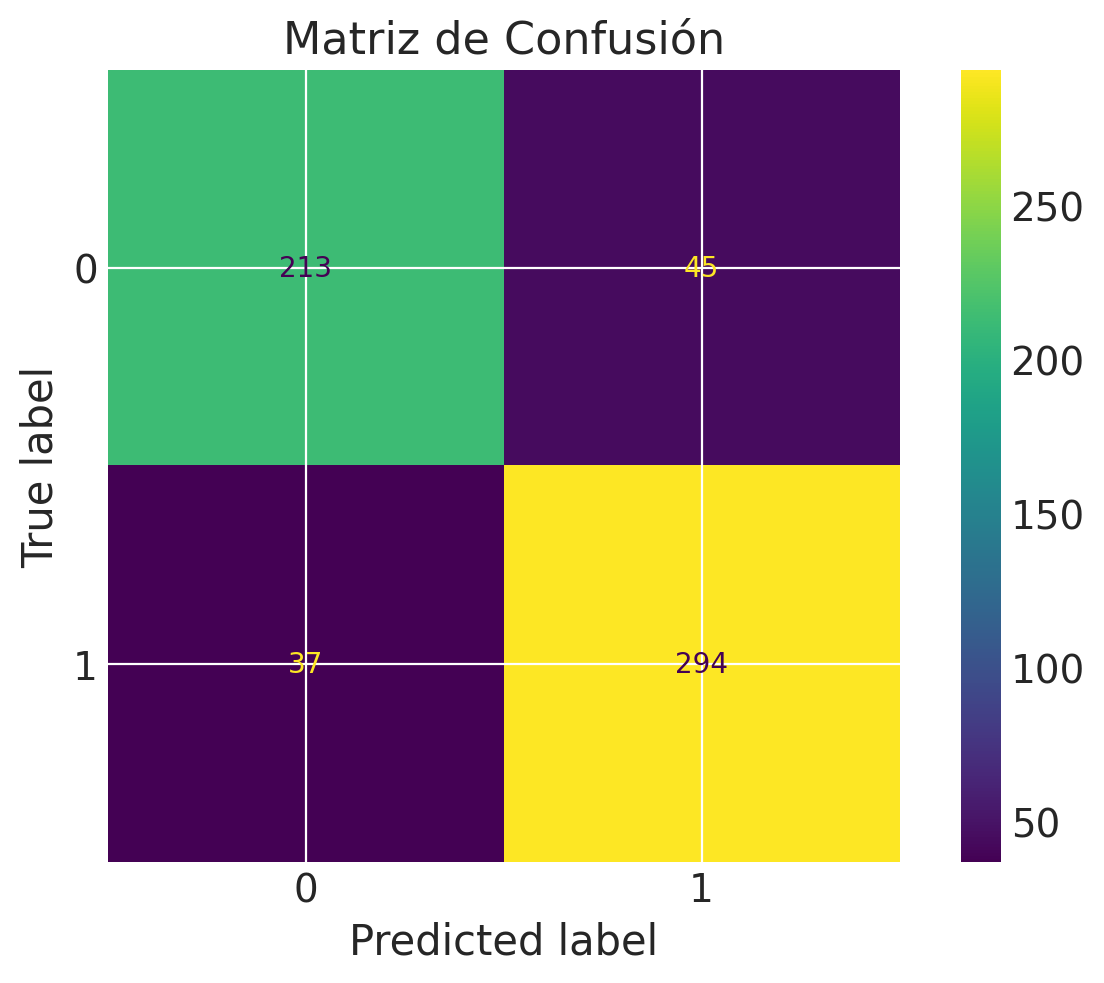

{'best_model': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.8, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, gamma=0, grow_policy=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=0.3, max_bin=None, max_cat_threshold=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
               max_leaves=None, min_child_weight=None, missing=nan,
               monotone_constraints=None, multi_strategy=None, n_estimators=500,
               n_jobs=None, num_parallel_tree=None, random_state=42, ...),
 'accuracy': 0.8607809847198642,
 'best_params': {'subsample': 1.0,
  'reg_lambda': 1.0,
  'reg_alpha': 0.5,
  'n_estimators': 500,
  'max_depth': 7,
  'learning_rate': 0.3,
  'gamma': 0,
  'colsample_bytree': 0.8}}

In [42]:
# Se realiza el reentranmiento de los modelos con los datos ahora depurados
xgboost_random_search(data, data_y, param_grid=param_grid)

Informe de clasificación
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       265
           1       0.83      0.82      0.82       324

    accuracy                           0.81       589
   macro avg       0.81      0.81      0.81       589
weighted avg       0.81      0.81      0.81       589

Matriz de confusión
[[211  54]
 [ 59 265]]


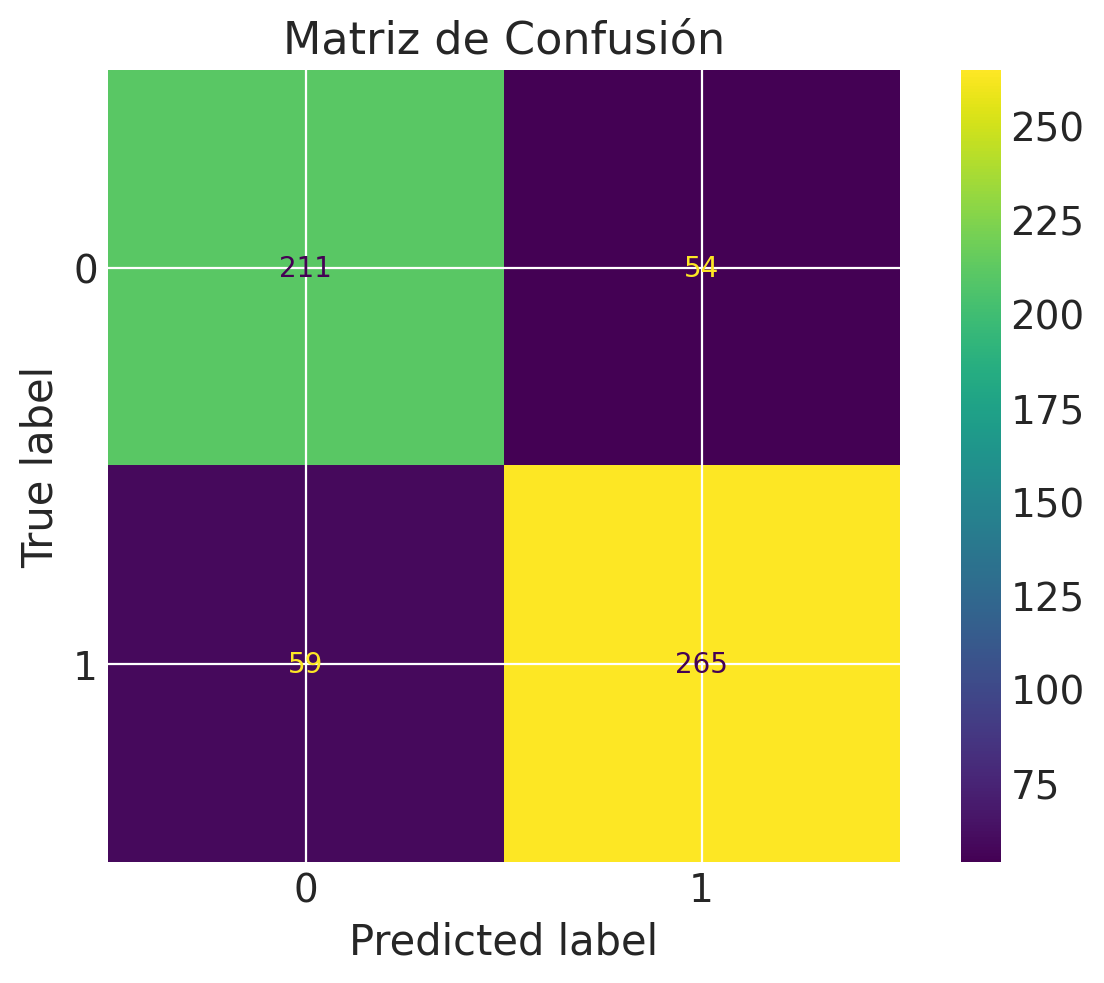

Pipeline(steps=[('scaler', StandardScaler()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500,
                               random_state=42))])

In [43]:
mlp_binary_classification(data,data_y)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Mejores hiperparámetros encontrados:
{'xgb__colsample_bytree': 0.7954166302845054, 'xgb__gamma': 0.015250124969524714, 'xgb__learning_rate': 0.046974706861722275, 'xgb__max_depth': 8, 'xgb__min_child_weight': 3.381022389395617, 'xgb__n_estimators': 543, 'xgb__subsample': 0.6633256208980205}

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       265
           1       0.85      0.90      0.88       324

    accuracy                           0.86       589
   macro avg       0.86      0.85      0.86       589
weighted avg       0.86      0.86      0.86       589


Matriz de confusión:
[[215  50]
 [ 33 291]]


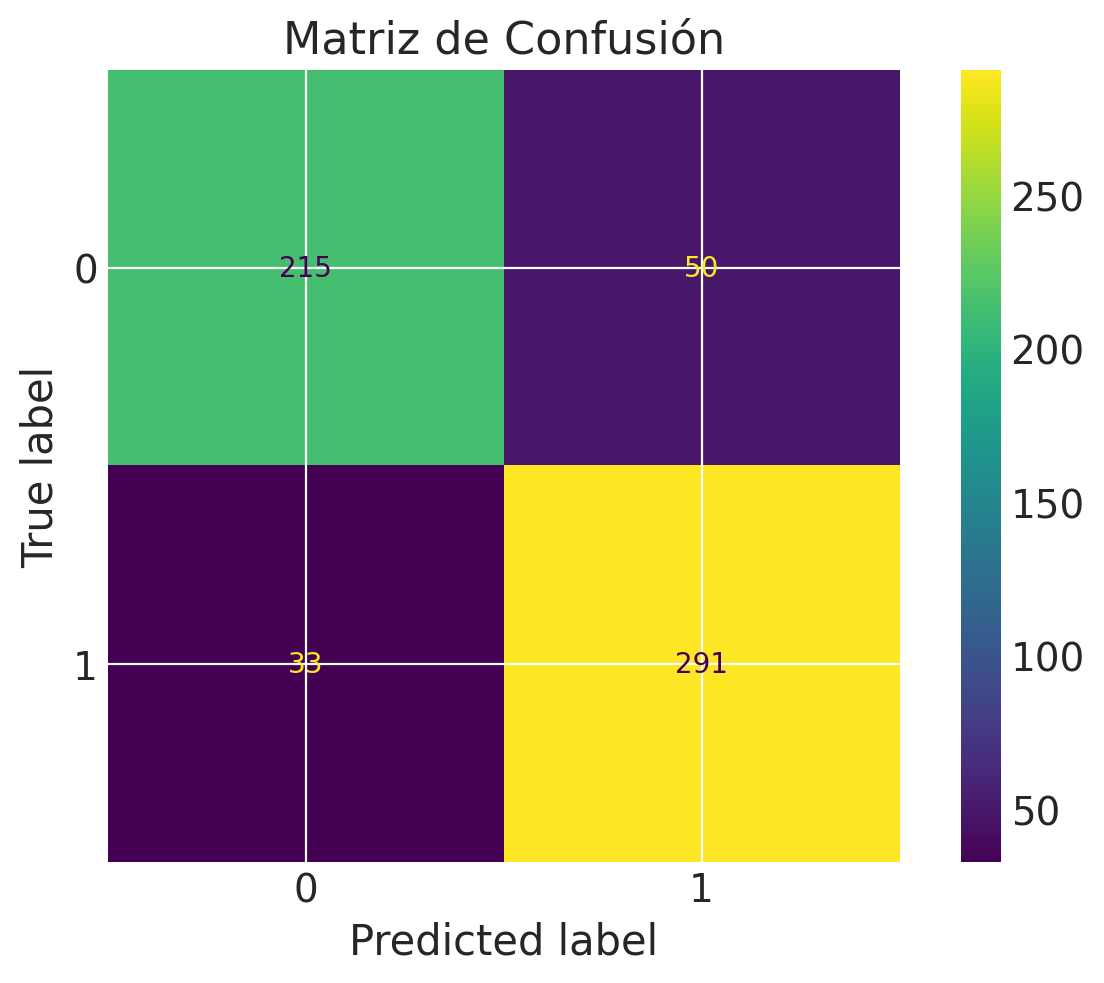

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('xgb',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            device=None,
                                                            early_stopping_rounds=None,
                                                            enable_categorical=False,
                                                            eval_metric='logloss',
                                                            feature_types=None,
                                                            gamma=None,
                                                            grow_policy=None,
                                                            importa...
                                        'xgb__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE14FB1EE0>,
                                        'xgb__min_child_weight': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BE17BCD6A0>,
                                        'xgb__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001BE1525BC10>,
                                        'xgb__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001BE1531D4C0>},
                   random_state=42, verbose=1)

In [44]:
xgboost_bayesopt_classifier(data,data_y)

In [29]:
svm_with_hyperparameter_tuning(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
final

In [ ]:
#target_column = 'Valor'
#mejores_caracteristicas, logbook, hof = seleccion_caracteristicas_genetico(final, target_column)
#print("Mejores características seleccionadas:", mejores_caracteristicas)
#print("Mejor fitness:", hof[0].fitness.values[0])

Learning rate set to 0.016266
0:	learn: 0.6892010	total: 144ms	remaining: 2m 24s
1:	learn: 0.6849006	total: 147ms	remaining: 1m 13s
2:	learn: 0.6809007	total: 149ms	remaining: 49.7s
3:	learn: 0.6770697	total: 152ms	remaining: 37.9s
4:	learn: 0.6740598	total: 155ms	remaining: 30.9s
5:	learn: 0.6708395	total: 158ms	remaining: 26.2s
6:	learn: 0.6679511	total: 161ms	remaining: 22.8s
7:	learn: 0.6644987	total: 163ms	remaining: 20.3s
8:	learn: 0.6619452	total: 166ms	remaining: 18.3s
9:	learn: 0.6590618	total: 168ms	remaining: 16.7s
10:	learn: 0.6560685	total: 171ms	remaining: 15.4s
11:	learn: 0.6531775	total: 173ms	remaining: 14.3s
12:	learn: 0.6504166	total: 176ms	remaining: 13.4s
13:	learn: 0.6481434	total: 179ms	remaining: 12.6s
14:	learn: 0.6459155	total: 181ms	remaining: 11.9s
15:	learn: 0.6432989	total: 184ms	remaining: 11.3s
16:	learn: 0.6406250	total: 186ms	remaining: 10.8s
17:	learn: 0.6377574	total: 188ms	remaining: 10.3s
18:	learn: 0.6355763	total: 192ms	remaining: 9.89s
19:	learn

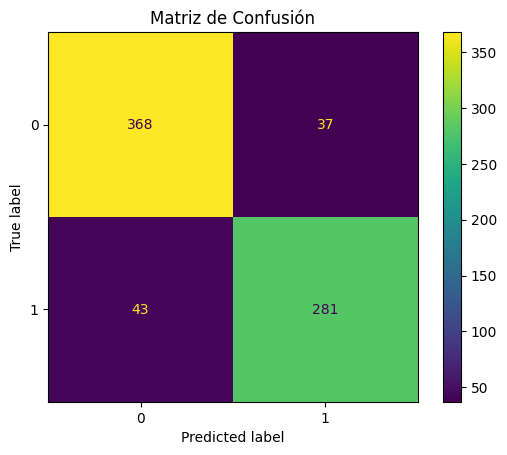

In [149]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from models_gen_X_y import plot_confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size = 0.2, stratify = data_y)

model = CatBoostClassifier()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
predictions = model.predict(X_test)
print(predictions)
plot_confusion_matrix(model, X_test, y_test)

In [150]:
print(classification_report(y_pred=predictions, y_true=y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       405
           1       0.88      0.87      0.88       324

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



In [151]:
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV
catboost_param_dist = {
    'depth': randint(4, 10),
    'learning_rate': uniform(0.01, 0.3),
    'iterations': randint(10, 1000),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(1, 255),
    'bagging_temperature': uniform(0.0, 1.0),
    'random_strength': uniform(0.0, 1.0)
}

CB = CatBoostClassifier()
random_search_cb = RandomizedSearchCV(estimator=CB, param_distributions=catboost_param_dist,
                                      cv = 5, verbose = 2, random_state=42)
random_search_cb.fit(X_train, y_train)
predictions = random_search_cb.predict(X_test)
print(classification_report(y_pred= predictions, y_true = y_test))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6774685	total: 2.46ms	remaining: 197ms
1:	learn: 0.6650460	total: 4.26ms	remaining: 168ms
2:	learn: 0.6537489	total: 6.1ms	remaining: 159ms
3:	learn: 0.6430964	total: 8.03ms	remaining: 155ms
4:	learn: 0.6319908	total: 10.1ms	remaining: 153ms
5:	learn: 0.6202916	total: 12.2ms	remaining: 152ms
6:	learn: 0.6119729	total: 14.3ms	remaining: 152ms
7:	learn: 0.6039733	total: 16.5ms	remaining: 150ms
8:	learn: 0.5956971	total: 18.5ms	remaining: 148ms
9:	learn: 0.5885184	total: 21.3ms	remaining: 152ms
10:	learn: 0.5825460	total: 23.5ms	remaining: 150ms
11:	learn: 0.5764911	total: 25.6ms	remaining: 147ms
12:	learn: 0.5698048	total: 27.8ms	remaining: 145ms
13:	learn: 0.5625014	total: 29.8ms	remaining: 143ms
14:	learn: 0.5570144	total: 31.8ms	remaining: 140ms
15:	learn: 0.5509326	total: 33.7ms	remaining: 137ms
16:	learn: 0.5462451	total: 35.8ms	remaining: 135ms
17:	learn: 0.5403823	total: 38.1ms	remaining: 133ms
18:	learn: 0.5

In [38]:
import pandas as pd


def print_dataframe(filtered_cv_results):
    """Pretty print for filtered dataframe"""
    for mean_precision, std_precision, mean_recall, std_recall, params in zip(
        filtered_cv_results["mean_test_precision"],
        filtered_cv_results["std_test_precision"],
        filtered_cv_results["mean_test_recall"],
        filtered_cv_results["std_test_recall"],
        filtered_cv_results["params"],
    ):
        print(
            f"precision: {mean_precision:0.3f} (±{std_precision:0.03f}),"
            f" recall: {mean_recall:0.3f} (±{std_recall:0.03f}),"
            f" for {params}"
        )
    print()


def refit_strategy(cv_results):
    """Define the strategy to select the best estimator.

    The strategy defined here is to filter-out all results below a precision threshold
    of 0.98, rank the remaining by recall and keep all models with one standard
    deviation of the best by recall. Once these models are selected, we can select the
    fastest model to predict.

    Parameters
    ----------
    cv_results : dict of numpy (masked) ndarrays
        CV results as returned by the `GridSearchCV`.

    Returns
    -------
    best_index : int
        The index of the best estimator as it appears in `cv_results`.
    """
    # print the info about the grid-search for the different scores
    precision_threshold = 0.98

    cv_results_ = pd.DataFrame(cv_results)
    print("All grid-search results:")
    print_dataframe(cv_results_)

    # Filter-out all results below the threshold
    high_precision_cv_results = cv_results_[
        cv_results_["mean_test_precision"] > precision_threshold
    ]

    print(f"Models with a precision higher than {precision_threshold}:")
    print_dataframe(high_precision_cv_results)

    high_precision_cv_results = high_precision_cv_results[
        [
            "mean_score_time",
            "mean_test_recall",
            "std_test_recall",
            "mean_test_precision",
            "std_test_precision",
            "rank_test_recall",
            "rank_test_precision",
            "params",
        ]
    ]

    # Select the most performant models in terms of recall
    # (within 1 sigma from the best)
    best_recall_std = high_precision_cv_results["mean_test_recall"].std()
    best_recall = high_precision_cv_results["mean_test_recall"].max()
    best_recall_threshold = best_recall - best_recall_std

    high_recall_cv_results = high_precision_cv_results[
        high_precision_cv_results["mean_test_recall"] > best_recall_threshold
    ]
    print(
        "Out of the previously selected high precision models, we keep all the\n"
        "the models within one standard deviation of the highest recall model:"
    )
    print_dataframe(high_recall_cv_results)

    # From the best candidates, select the fastest model to predict
    fastest_top_recall_high_precision_index = high_recall_cv_results[
        "mean_score_time"
    ].idxmin()

    print(
        "\nThe selected final model is the fastest to predict out of the previously\n"
        "selected subset of best models based on precision and recall.\n"
        "Its scoring time is:\n\n"
        f"{high_recall_cv_results.loc[fastest_top_recall_high_precision_index]}"
    )

    return fastest_top_recall_high_precision_index

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


scores = ['precision', 'recall']
tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]

grid_search = GridSearchCV(
    SVC(), tuned_parameters, scoring=scores, refit=refit_strategy
)
grid_search.fit(X_train, y_train)



Learning rate set to 0.005551
0:	learn: 0.6912576	total: 3.24ms	remaining: 3.23s
1:	learn: 0.6889482	total: 5.85ms	remaining: 2.92s
2:	learn: 0.6871278	total: 8.4ms	remaining: 2.79s
3:	learn: 0.6853090	total: 11.5ms	remaining: 2.86s
4:	learn: 0.6829921	total: 14.6ms	remaining: 2.91s
5:	learn: 0.6812541	total: 17.4ms	remaining: 2.88s
6:	learn: 0.6791784	total: 19.8ms	remaining: 2.81s
7:	learn: 0.6764626	total: 22.5ms	remaining: 2.79s
8:	learn: 0.6738521	total: 25.1ms	remaining: 2.77s
9:	learn: 0.6718462	total: 27.5ms	remaining: 2.73s
10:	learn: 0.6701867	total: 29.9ms	remaining: 2.69s
11:	learn: 0.6684742	total: 32.3ms	remaining: 2.66s
12:	learn: 0.6667540	total: 34.6ms	remaining: 2.63s
13:	learn: 0.6651552	total: 37.1ms	remaining: 2.61s
14:	learn: 0.6635686	total: 39.3ms	remaining: 2.58s
15:	learn: 0.6617687	total: 41.4ms	remaining: 2.54s
16:	learn: 0.6601617	total: 44.2ms	remaining: 2.56s
17:	learn: 0.6583547	total: 46.8ms	remaining: 2.55s
18:	learn: 0.6564700	total: 49.1ms	remaining:

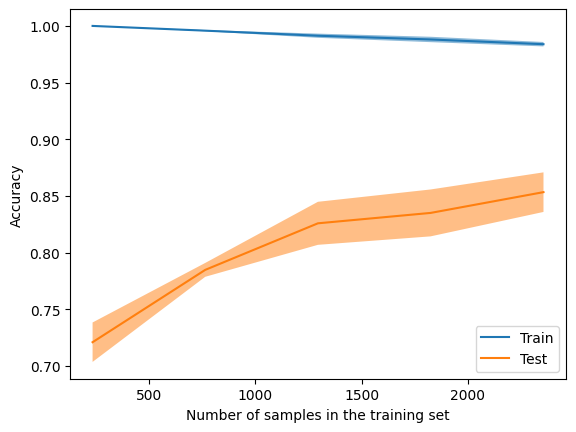

In [20]:
"""from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC
from sklearn.utils import shuffle
X, y = shuffle(data, data_y, random_state=42)
LearningCurveDisplay.from_estimator(CatBoostClassifier(), X,y,scoring='accuracy', cv=5)"""

In [ ]:
# Guardar plk 85%+ modelos
# countplot
# gráficos de conf, roc curve, model selection
# proceso de plks en scripts


# MODELOS
# SVM
# xgboost randon search + bayes opt
# catboost
# mlp

In [52]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pytensor
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [53]:
%config InlineBackend.figure_format = 'retina'
floatX = pytensor.config.floatX
RANDOM_SEED = 9927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [57]:
def construct_nn(ann_input, ann_output):
    n_hidden = 5

    # Initialize random weights between each layer
    init_1 = rng.standard_normal(size=(X_train.shape[1], n_hidden)).astype(floatX)
    init_2 = rng.standard_normal(size=(n_hidden, n_hidden)).astype(floatX)
    init_out = rng.standard_normal(size=n_hidden).astype(floatX)

    coords = {
        "hidden_layer_1": np.arange(n_hidden),
        "hidden_layer_2": np.arange(n_hidden),
        "train_cols": np.arange(X_train.shape[1]),
        "obs_id": np.arange(X_train.shape[0]),
    }
    with pm.Model(coords=coords) as neural_network:
        ann_input = pm.Data("ann_input", X_train, dims=("obs_id", "train_cols"))
        ann_output = pm.Data("ann_output", y_train, dims="obs_id")

        # Weights from input to hidden layer
        weights_in_1 = pm.Normal(
            "w_in_1", 0, sigma=1, initval=init_1, dims=("train_cols", "hidden_layer_1")
        )

        # Weights from 1st to 2nd layer
        weights_1_2 = pm.Normal(
            "w_1_2", 0, sigma=1, initval=init_2, dims=("hidden_layer_1", "hidden_layer_2")
        )

        # Weights from hidden layer to output
        weights_2_out = pm.Normal("w_2_out", 0, sigma=1, initval=init_out, dims="hidden_layer_2")

        # Build neural-network using tanh activation function
        act_1 = pm.math.tanh(pm.math.dot(ann_input, weights_in_1))
        act_2 = pm.math.tanh(pm.math.dot(act_1, weights_1_2))
        act_out = pm.math.sigmoid(pm.math.dot(act_2, weights_2_out))

        # Binary classification -> Bernoulli likelihood
        out = pm.Bernoulli(
            "out",
            act_out,
            observed=ann_output,
            total_size=y_train.shape[0],  # IMPORTANT for minibatches
            dims="obs_id",
        )
    return neural_network

X_train, X_test, y_train, y_test = train_test_split(data, data_y, test_size = 0.2, stratify = data_y)
neural_network = construct_nn(X_train, y_train)

c:\Users\ivo\.conda\envs\geotiff\lib\site-packages\pymc\data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(


In [61]:
%%time
with neural_network:
    approx = pm.fit(n=30_000)

Interrupted at 655 [2%]: Average Loss = 2,235.6


CPU times: total: 5min 14s
Wall time: 5min 15s


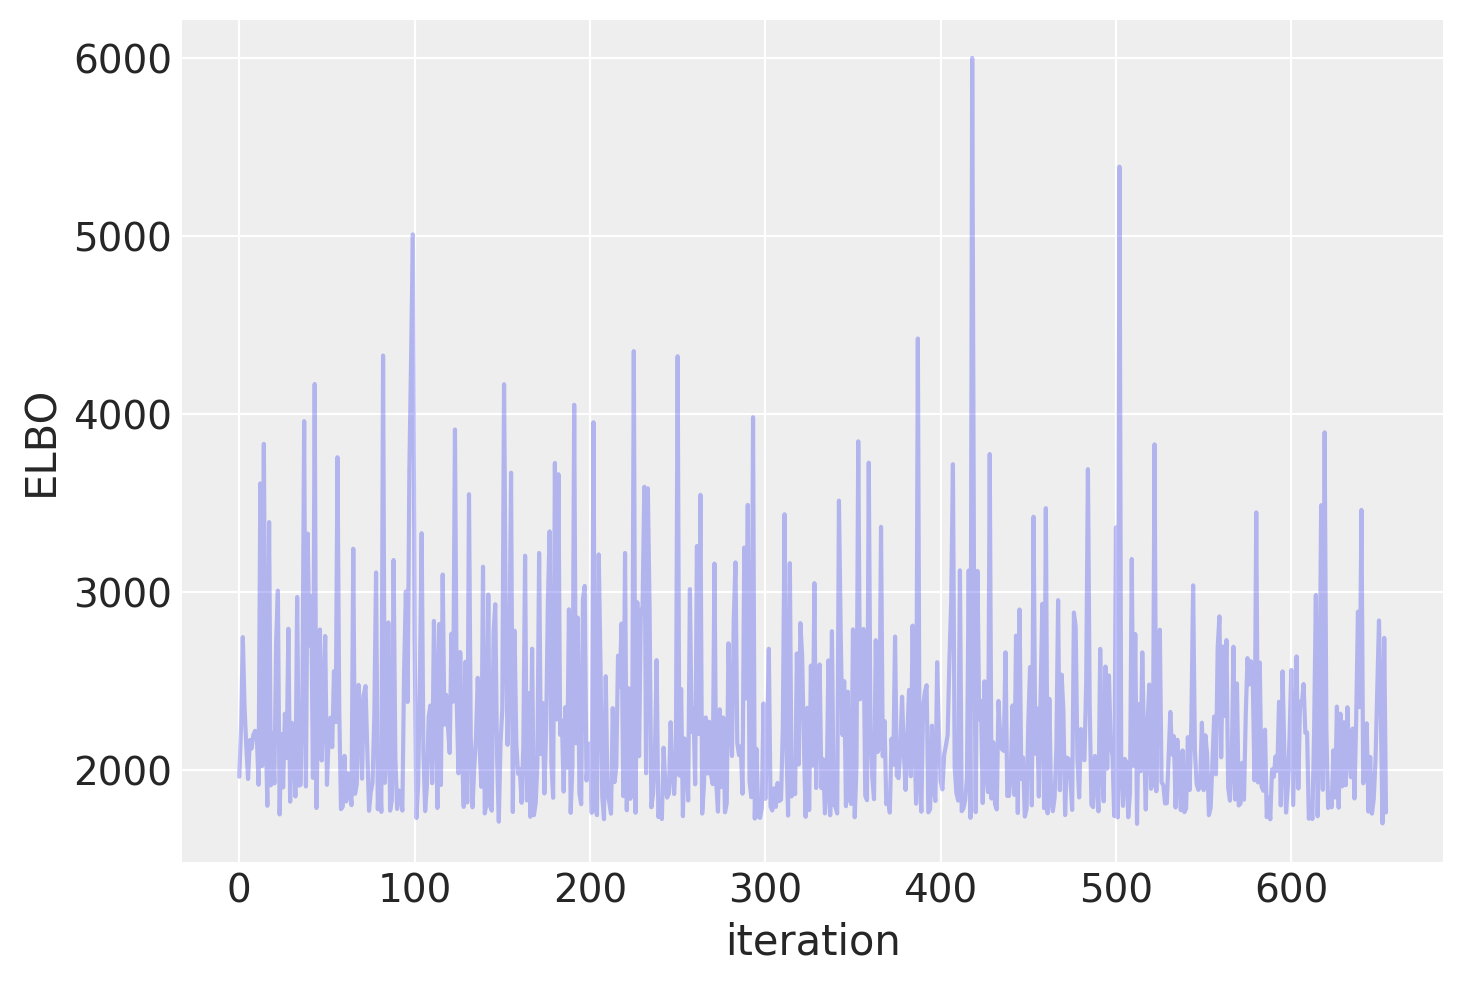

In [62]:
plt.plot(approx.hist, alpha=0.3)
plt.ylabel("ELBO")
plt.xlabel("iteration");

In [30]:
import numpy as np
import pandas as pd
from typing import Tuple
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def kmeans_clustering(data: pd.DataFrame, k: int, max_iterations: int = 100) -> Tuple[pd.DataFrame, np.ndarray]:
    """
    Implementa el algoritmo de clustering K-means para DataFrames.
    
    :param data: DataFrame con las características
    :param k: Número de clusters
    :param max_iterations: Número máximo de iteraciones
    :return: Tupla con DataFrame de centroides y array de etiquetas de cluster para cada punto
    """
    # Convertir DataFrame a array numpy para cálculos más rápidos
    data_array = data.values
    
    # Inicializar centroides aleatoriamente
    centroid_indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data_array[centroid_indices]
    
    for _ in range(max_iterations):
        # Asignar puntos a los centroides más cercanos
        distances = np.sqrt(((data_array[:, np.newaxis, :] - centroids) ** 2).sum(axis=2))
        labels = np.argmin(distances, axis=1)
        
        # Actualizar centroides
        new_centroids = np.array([data_array[labels == i].mean(axis=0) for i in range(k)])
        
        # Verificar convergencia
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    # Convertir centroides de vuelta a DataFrame
    centroid_df = pd.DataFrame(centroids, columns=data.columns)
    
    return centroid_df, labels

def visualize_high_dim_clusters(data: pd.DataFrame, labels: np.ndarray, centroids: pd.DataFrame, 
                                landslide_labels: np.ndarray, method: str = 'pca'):
    """
    Visualiza los resultados del clustering K-means para datos de alta dimensionalidad,
    diferenciando entre muestras de deslizamiento y no deslizamiento.
    
    :param data: DataFrame con las características
    :param labels: Array numpy de etiquetas de cluster para cada punto
    :param centroids: DataFrame de centroides
    :param landslide_labels: Array numpy de etiquetas de deslizamiento (1) y no deslizamiento (0)
    :param method: Método de reducción de dimensionalidad ('pca' o 'tsne')
    """
    if method == 'pca':
        reducer = PCA(n_components=2)
    elif method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42)
    else:
        raise ValueError("El método debe ser 'pca' o 'tsne'")

    # Reducir dimensionalidad de los datos y centroides
    data_2d = reducer.fit_transform(data)
    centroids_2d = reducer.transform(centroids)

    # Visualizar los resultados
    plt.figure(figsize=(12, 8))
    
    # Diferenciar entre deslizamiento y no deslizamiento
    scatter_landslide = plt.scatter(data_2d[landslide_labels == 1, 0], data_2d[landslide_labels == 1, 1],
                                    c=labels[landslide_labels == 1], cmap='viridis', marker='o', label='Deslizamiento')
    scatter_non_landslide = plt.scatter(data_2d[landslide_labels == 0, 0], data_2d[landslide_labels == 0, 1],
                                        c=labels[landslide_labels == 0], cmap='viridis', marker='s', label='No Deslizamiento')
    
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', marker='x', s=200, linewidths=3, label='Centroides')
    
    plt.colorbar(scatter_landslide)
    plt.title(f'Resultados del Clustering K-means ({method.upper()})')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.legend()
    plt.show()

def visualize_feature_importance(data: pd.DataFrame, labels: np.ndarray, n_top_features: int = 10):
    """
    Visualiza la importancia de las características basada en la varianza entre clusters.
    
    :param data: DataFrame con las características
    :param labels: Array numpy de etiquetas de cluster para cada punto
    :param n_top_features: Número de características principales a visualizar
    """
    k = len(np.unique(labels))
    feature_importance = np.zeros(data.shape[1])

    for i in range(k):
        cluster_data = data[labels == i]
        cluster_mean = cluster_data.mean()
        feature_importance += ((cluster_data - cluster_mean) ** 2).sum()

    # Normalizar la importancia de las características
    feature_importance /= feature_importance.sum()

    # Ordenar las características por importancia
    sorted_features = feature_importance.sort_values(ascending=False)
    top_features = sorted_features.head(n_top_features)

    # Visualizar la importancia de las características
    plt.figure(figsize=(12, 6))
    top_features.plot(kind='bar')
    plt.xlabel('Nombre de la característica')
    plt.ylabel('Importancia relativa')
    plt.title('Importancia de las características en el clustering')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [59]:
data = X
data_y = y

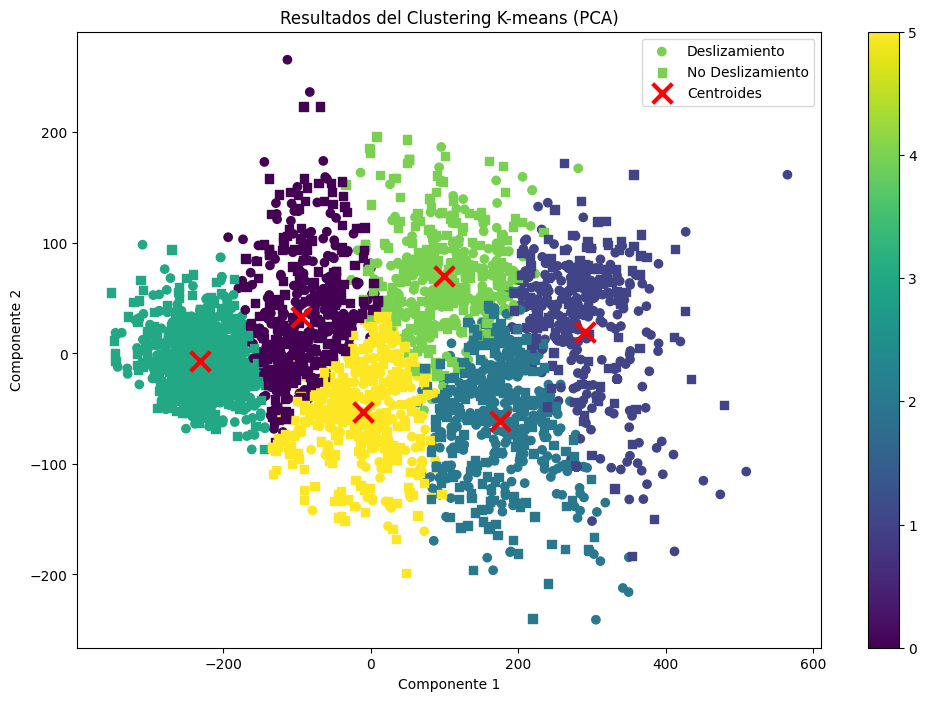

In [88]:
centroids, label = kmeans_clustering(data, 6)
visualize_high_dim_clusters(data, label, centroids, method='pca', landslide_labels=data_y)

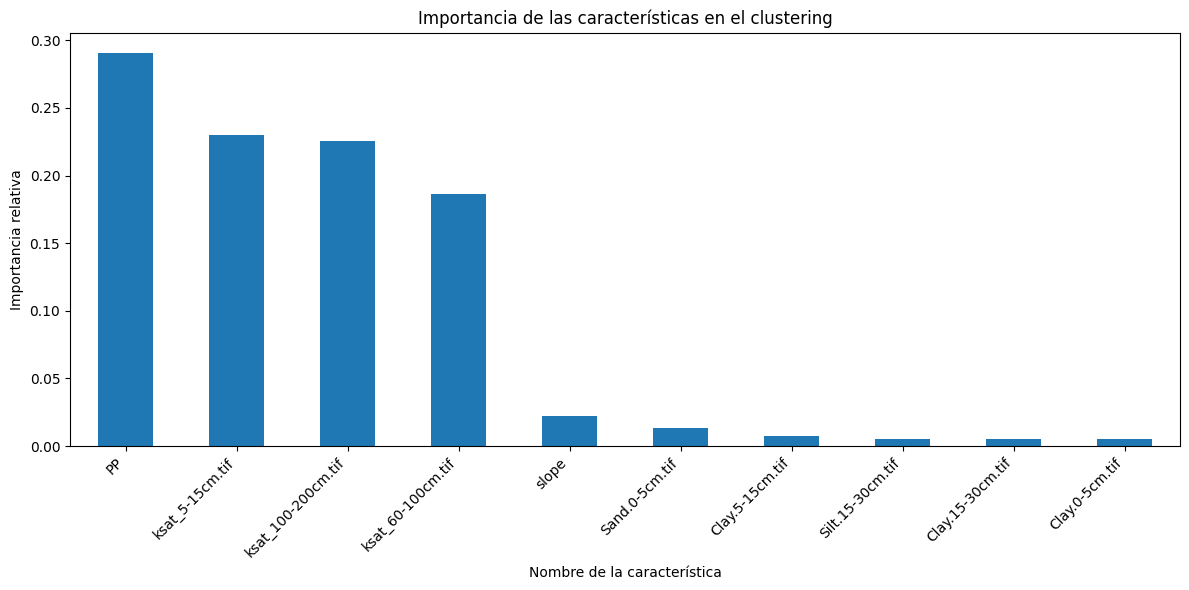

In [89]:
visualize_feature_importance(data, label)

In [90]:
def landslide_distribution_table(labels: np.ndarray, landslide_labels: np.ndarray) -> pd.DataFrame:
    """
    Crea una tabla que muestra la distribución de muestras de deslizamiento (1) y no deslizamiento (0) en cada cluster.
    
    :param labels: Array numpy de etiquetas de cluster para cada punto
    :param landslide_labels: Array numpy de etiquetas de deslizamiento (1) y no deslizamiento (0)
    :return: DataFrame con la distribución de deslizamientos por cluster
    """
    clusters = np.unique(labels)
    distribution = []

    for cluster in clusters:
        cluster_mask = labels == cluster
        cluster_landslides = landslide_labels[cluster_mask]
        
        non_landslides = np.sum(cluster_landslides == 0)
        landslides = np.sum(cluster_landslides == 1)
        total = non_landslides + landslides
        
        distribution.append({
            'Cluster': cluster,
            'No Deslizamiento (0)': non_landslides,
            'Deslizamiento (1)': landslides,
            'Total': total,
            '% No Deslizamiento': non_landslides / total * 100,
            '% Deslizamiento': landslides / total * 100
        })

    df_distribution = pd.DataFrame(distribution)
    df_distribution.set_index('Cluster', inplace=True)
    
    # Añadir fila de totales
    totals = df_distribution.sum()
    totals['% No Deslizamiento'] = totals['No Deslizamiento (0)'] / totals['Total'] * 100
    totals['% Deslizamiento'] = totals['Deslizamiento (1)'] / totals['Total'] * 100
    df_distribution.loc['Total'] = totals

    return df_distribution

In [91]:
landslide_distribution_table(label, data_y)

No Deslizamiento (0)  Deslizamiento (1)   Total  % No Deslizamiento  \
Cluster                                                                        
0                       249.0              252.0   501.0           49.700599   
1                       117.0              303.0   420.0           27.857143   
2                       213.0              267.0   480.0           44.375000   
3                       418.0              450.0   868.0           48.156682   
4                       258.0              205.0   463.0           55.723542   
5                       275.0              141.0   416.0           66.105769   
Total                  1530.0             1618.0  3148.0           48.602287   

         % Deslizamiento  
Cluster                   
0              50.299401  
1              72.142857  
2              55.625000  
3              51.843318  
4              44.276458  
5              33.894231  
Total          51.397713

In [92]:
import numpy as np
import pandas as pd
from typing import Tuple
from sklearn.utils import resample

def select_non_landslide_samples(data: pd.DataFrame, labels: np.ndarray, landslide_labels: np.ndarray, 
                                 diversity_factor: float = 0.2) -> Tuple[pd.DataFrame, np.ndarray]:
    """
    Selecciona muestras de no deslizamiento basadas en los resultados del clustering.
    
    :param data: DataFrame con todas las muestras y sus características
    :param labels: Array de etiquetas de cluster para cada muestra
    :param landslide_labels: Array de etiquetas de deslizamiento (1) y no deslizamiento (0)
    :param diversity_factor: Proporción de muestras a seleccionar de otros clusters (default 0.2)
    :return: Tuple con DataFrame de muestras no deslizamiento seleccionadas y sus etiquetas
    """
    # Crear tabla de distribución
    clusters = np.unique(labels)
    distribution = []
    for cluster in clusters:
        cluster_mask = labels == cluster
        cluster_landslides = landslide_labels[cluster_mask]
        non_landslides = np.sum(cluster_landslides == 0)
        landslides = np.sum(cluster_landslides == 1)
        total = non_landslides + landslides
        distribution.append({
            'Cluster': cluster,
            'No Deslizamiento (0)': non_landslides,
            'Deslizamiento (1)': landslides,
            'Total': total,
            '% No Deslizamiento': non_landslides / total * 100,
            '% Deslizamiento': landslides / total * 100
        })
    df_distribution = pd.DataFrame(distribution)
    
    # Identificar el cluster con menor porcentaje de deslizamientos
    target_cluster = df_distribution.loc[df_distribution['% Deslizamiento'].idxmin(), 'Cluster']
    
    # Seleccionar muestras no deslizamiento del cluster objetivo
    target_mask = (labels == target_cluster) & (landslide_labels == 0)
    target_samples = data[target_mask]
    
    # Calcular el número de muestras adicionales a seleccionar de otros clusters
    n_additional = int(len(target_samples) * diversity_factor)
    
    # Seleccionar muestras adicionales de otros clusters
    other_clusters_mask = (labels != target_cluster) & (landslide_labels == 0)
    other_samples = data[other_clusters_mask]
    additional_samples = resample(other_samples, n_samples=n_additional, replace=False)
    
    # Combinar muestras
    selected_samples = pd.concat([target_samples, additional_samples])
    selected_labels = np.zeros(len(selected_samples))  # Todas son no deslizamiento (0)
    
    print(f"Seleccionadas {len(target_samples)} muestras del cluster {target_cluster}")
    print(f"Añadidas {n_additional} muestras de otros clusters para diversidad")
    print(f"Total de muestras no deslizamiento seleccionadas: {len(selected_samples)}")
    
    return selected_samples, selected_labels


In [124]:
non_landslide_samples, non_landslide_labels = select_non_landslide_samples(data, label, data_y, diversity_factor=0.8)

Seleccionadas 275 muestras del cluster 5
Añadidas 220 muestras de otros clusters para diversidad
Total de muestras no deslizamiento seleccionadas: 495


In [125]:
non_landslide_samples.columns

Index(['slope', 'valor_humedad_suelo1', 'PP', 'ksat_60-100cm.tif',
       'PIRange_Clay.15-30cm.tif', 'PIRange_Bulkd.60-100cm.tif',
       'PIRange_Clay.30-60cm.tif', 'PIRange_Clay.0-5cm.tif',
       'PIRange_Clay.100-200cm.tif', 'PIRange_Clay.60-100cm.tif',
       'Bulkd.60-100cm.tif', 'PIRange_Bulkd.5-15cm.tif', 'Clay.5-15cm.tif',
       'Clay.15-30cm.tif', 'PIRange_Bulkd.100-200cm.tif',
       'PIRange_Sand.15-30cm.tif', 'Clay.0-5cm.tif', 'Silt.15-30cm.tif',
       'n_30-60cm.tif', 'PIRange_Sand.30-60cm.tif', 'n_5-15cm.tif',
       'PIRange_Sand.60-100cm.tif', 'Bulkd.15-30cm.tif',
       'PIRange_Sand.0-5cm.tif', 'ksat_100-200cm.tif', 'AvMoist.60-100cm.tif',
       'ksat_5-15cm.tif', 'Sand.0-5cm.tif', 'n_60-100cm.tif',
       'ksat.15-30cm.tif'],
      dtype='object')

In [143]:
non_landslide_samples['Valor'] = 0

In [144]:
non_landslide_labels = pd.DataFrame()
non_landslide_labels = non_landslide_samples['Valor']
non_landslide_samples = non_landslide_samples.drop(columns=['Valor'])

In [148]:
data = pd.concat([data, non_landslide_samples])
data_y = pd.concat([data_y, non_landslide_labels])